In [1]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C
from scipy.stats import linregress
from statistics import median
from scipy.optimize import fminbound
import json
import itertools
from tqdm.notebook import tqdm
from multiprocess import Pool

In [2]:
def get_entropy_from_culling_factor_v2(c):
    S = od()
    sn = 0
    for E in c:
        S[E] = np.log(c[E])
        S[E] += sn
        sn += np.log(1 - c[E])
    return S

def get_entropy_from_culling_factor_with_heat_v2(c):
    S = od()
    sn = 0
    for E in c:
        S[E] = np.log(c[E])
        S[E] += sn
        sn += np.log(1 - c[E])
    return S

def stitch_S(heat, cool):
    #not infinite values
    niv = sorted( list({E for E, S in heat["S"].items() if not np.isinf(S)} &
                       {E for E, S in cool["S"].items() if not np.isinf(S)}) )
    #chosen not infinite values
    cniv = niv[len(niv) // 3 : 2 * len(niv) // 3]
    #print(cniv)
    shift = 0
    count = 0
    for E in cniv:
        shift += heat["S"][E] - cool["S"][E]
        count += 1
    shift /= count

    result = od()
    for E in cool["S"]:
        if E < median(cniv):
            result[E] = cool["S"][E]
    for E in heat["S"]:
        if E >= median(cniv):
            result[E] = heat["S"][E] - shift

    result = dict(sorted(result.items(), key=lambda item: item[0]))
    return {"S": result, "L": heat["L"]}

def calc_hc(st, T):

    E = mp.mpf(0)
    E_sq = mp.mpf(0)
    E_qr = mp.mpf(0)
    Z = mp.mpf(0)
    for fe, fS in st['S'].items():
        e = mp.mpf(fe)
        S = mp.mpf(fS)
        w = mp.exp(S - e / T)
        Z += w
        E += w * e
        E_sq += w * e * e
        E_qr += w * e * e * e * e
    avgE = E / Z;
    avgE_sq = E_sq / Z;
    avgE_qr = E_qr / Z;
    # T, C, average E, BinderCumulant
    return T, float( (avgE_sq - avgE * avgE) / (T * T) ), float( avgE ), float(1 - (avgE_qr / (3 * avgE_sq * avgE_sq)))

In [7]:
def read_files_v2(parameters):
    q=parameters["q"];
    L=parameters["L"];
    R=parameters["R"];
    nSteps=parameters["nSteps"];
    seed=parameters["seed"];
    heat=parameters["heat"];
    N = L * L;
    name = "./datasets/2DPotts/2DPotts{}_q{}_N{}_R{}_nSteps{}_run{}X.txt".format("Heating" * heat, q, N, R, nSteps, seed)
    print(name)
    culling_factor = od()
    print(N, R, nSteps, heat)
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c
    parameters["culling_factor"] = culling_factor
    if not heat:
        parameters["S"] = get_entropy_from_culling_factor_v2(culling_factor)
    else:
        parameters["S"] = get_entropy_from_culling_factor_with_heat_v2(culling_factor)
    
    return parameters

def read_tuple_files(tpl):
    if tpl[1]["heat"]:
        return {
            "cool": read_files_v2(tpl[0]),
            "heat": read_files_v2(tpl[1])
        }


In [25]:
q = 10;
L = 16;
R = 131072;
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9];
heat, cool = [{
    "q": q,
    "L": L,
    "R" : R,
    "nSteps" : 10,
    "seed" : seed,
    "heat": True
} for seed in seed_list], [{
    "q": q,
    "L": L,
    "R" : R,
    "nSteps" : 10,
    "seed" : seed,
    "heat": False
} for seed in seed_list]

parameters = []
for x in zip(cool, heat):
    parameters.append(read_tuple_files(x))


./datasets/2DPotts/2DPotts_q10_N256_R131072_nSteps10_run0X.txt
256 131072 10 False


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


./datasets/2DPotts/2DPottsHeating_q10_N256_R131072_nSteps10_run0X.txt
256 131072 10 True


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


./datasets/2DPotts/2DPotts_q10_N256_R131072_nSteps10_run1X.txt
256 131072 10 False
./datasets/2DPotts/2DPottsHeating_q10_N256_R131072_nSteps10_run1X.txt
256 131072 10 True
./datasets/2DPotts/2DPotts_q10_N256_R131072_nSteps10_run2X.txt
256 131072 10 False
./datasets/2DPotts/2DPottsHeating_q10_N256_R131072_nSteps10_run2X.txt
256 131072 10 True
./datasets/2DPotts/2DPotts_q10_N256_R131072_nSteps10_run3X.txt
256 131072 10 False
./datasets/2DPotts/2DPottsHeating_q10_N256_R131072_nSteps10_run3X.txt
256 131072 10 True
./datasets/2DPotts/2DPotts_q10_N256_R131072_nSteps10_run4X.txt
256 131072 10 False
./datasets/2DPotts/2DPottsHeating_q10_N256_R131072_nSteps10_run4X.txt
256 131072 10 True
./datasets/2DPotts/2DPotts_q10_N256_R131072_nSteps10_run5X.txt
256 131072 10 False
./datasets/2DPotts/2DPottsHeating_q10_N256_R131072_nSteps10_run5X.txt
256 131072 10 True
./datasets/2DPotts/2DPotts_q10_N256_R131072_nSteps10_run6X.txt
256 131072 10 False
./datasets/2DPotts/2DPottsHeating_q10_N256_R131072_nSteps

In [27]:
[seed for seed in seed_list]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [28]:
for i, x in enumerate(parameters):
    parameters[i]["stitched"] = stitch_S(x["heat"], x["cool"])

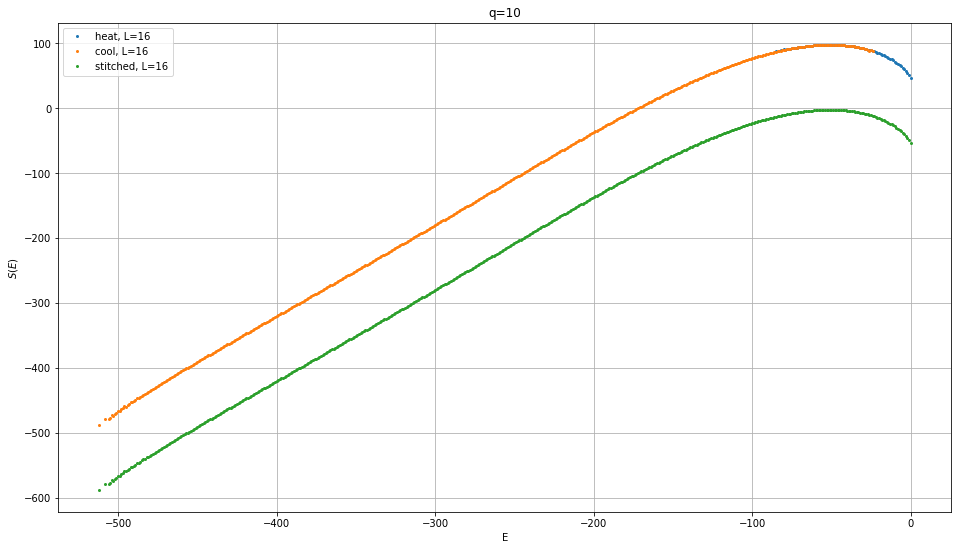

In [30]:
i = 0
heat, cool, st = parameters[i]["heat"], parameters[i]["cool"], parameters[i]["stitched"]

plt.figure(figsize=(16, 9))

plt.plot([E for E in heat["S"]],
         [S + 100 for E, S in heat["S"].items()]
         , 'o', label="heat, L={}".format(cool["L"]), markersize=2)

plt.plot([E for E in cool["S"]],
         [S + 100 for E, S in cool["S"].items()]
         , 'o', label="cool, L={}".format(cool["L"]), markersize=2)

plt.plot([E for E in st["S"]],
         [S for E, S in st["S"].items()]
         , 'o', label="stitched, L={}".format(st["L"]), markersize=2)

plt.ylabel("$S(E)$")
plt.xlabel("E")

plt.title('q={}'.format(q))
plt.legend()
plt.grid()
#plt.savefig("./S_stitched(E)_D{}_L{}.png".format(heat["D"], heat["L"]))

In [31]:
import mpmath as mp
mp.mp.dps = 50
mp.mp.pretty = True
print(mp.mp)

Mpmath settings:
  mp.prec = 169               [default: 53]
  mp.dps = 50                 [default: 15]
  mp.trap_complex = False     [default: False]


In [32]:
beta_0 = np.log(1 + np.sqrt(q))
beta_0, 1 / beta_0

(1.4260624389053682, 0.7012315679302166)

In [57]:
hc = {}
E = {}
BC = {}

for parameter in tqdm(parameters[:1]):
    heat, cool, st = parameter["heat"], parameter["cool"], parameter["stitched"]
    L = st['L']
    N = L * L

    hc[L] = {}
    E[L] = {}
    BC[L] = {}
    for T in tqdm(np.linspace(0.4, 2.0, 1000)):
        _, hc[L][T], E[L][T], BC[L][T] = calc_hc(st, T)


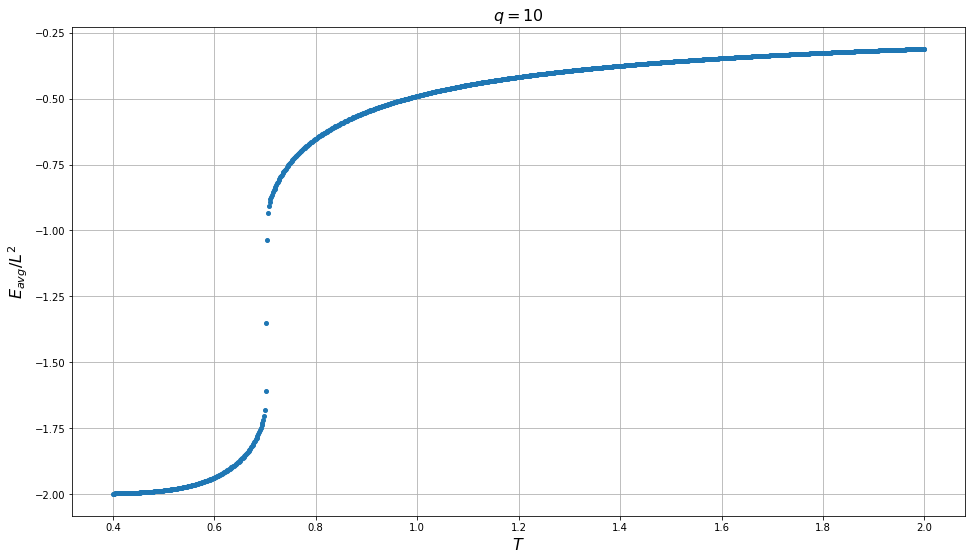

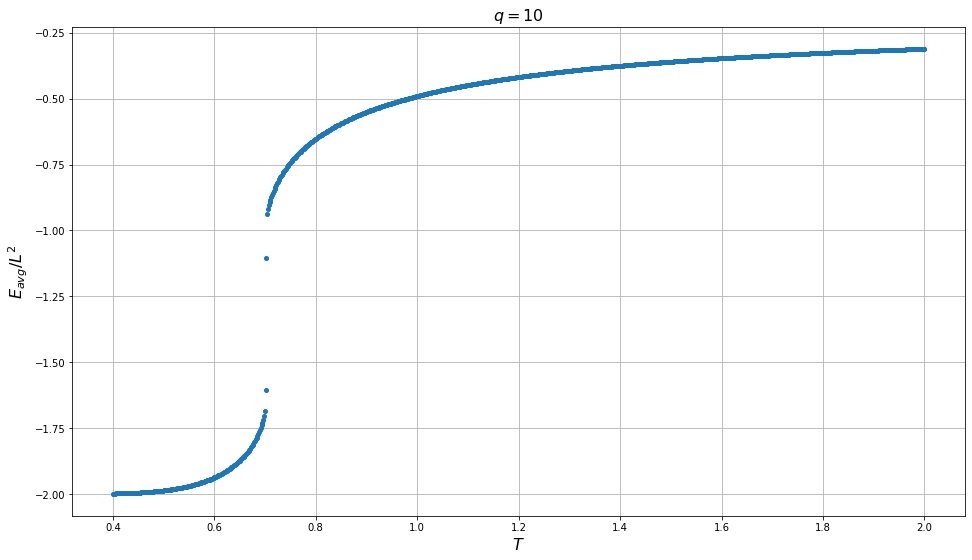

In [60]:
for L in L_list:
    plt.figure(figsize=(16, 9))

    plt.plot([float(T) for T in E[L]], [float(E) / (L * L) for T, E in E[L].items()], 'o', markerSize = 4)
    plt.grid()
    plt.title("$q={}$".format(q), fontsize=16)
    plt.ylabel('$E_{avg} / L^2$', fontsize=16)
    plt.xlabel('$T$', fontsize=16)
    plt.savefig("./E_avg(T)_Potts_q{}_L{}.png".format(q, L))

    with open("./tmp/E_avg(T)_Potts_q{}_L{}.txt".format(q, L), 'w') as fp:
        json.dump(E, fp);

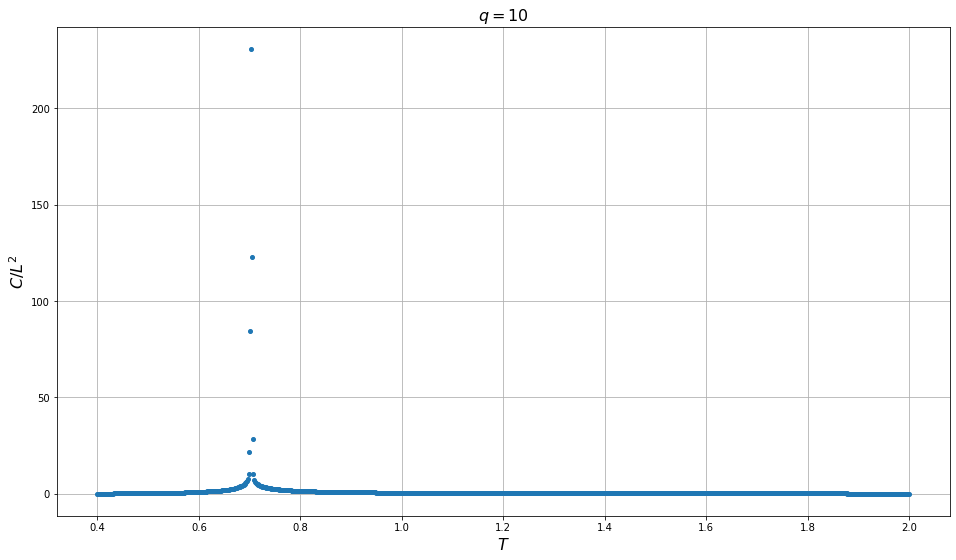

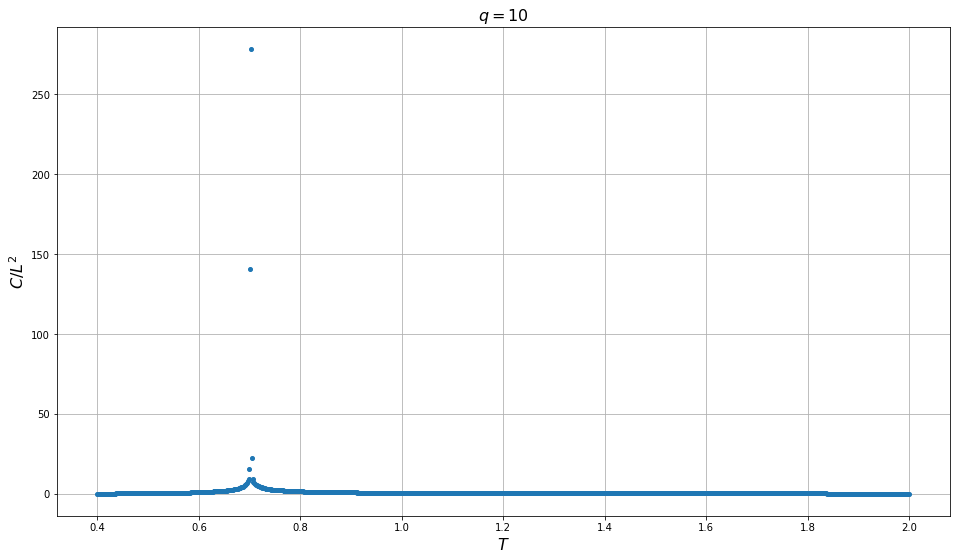

In [61]:
for L in L_list:
    plt.figure(figsize=(16, 9))

    plt.plot([float(T) for T in hc[L]], [float(C) / (L * L) for T, C in hc[L].items()], 'o', markerSize = 4)
    plt.grid()
    plt.title("$q={}$".format(q), fontsize=16)
    plt.ylabel('$C / L^2$', fontsize=16)
    plt.xlabel('$T$', fontsize=16)
    plt.savefig("./C(T)_Potts_q{}_L{}.png".format(q, L))

    with open("./tmp/hc(T)_Potts_q{}_L{}.txt".format(q, L), 'w') as fp:
        json.dump(hc, fp);

In [66]:
a, b = 0.6, 0.8

In [68]:
T_crit = {}
for x in tqdm(parameters):
    st = x["stitched"]
    L = st["L"]
    t, c, _, _ = fminbound(lambda T: - calc_hc(st, T)[1], a, b, maxfun=500, full_output=1, disp=2)
    T_crit[L] = {
        "T_crit": float(t),
        "C_crit": float(-c / (L * L))
    }
T_crit


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )



{30: {'T_crit': 0.7029166718806295, 'C_crit': 235.10827594606167},
 40: {'T_crit': 0.7021337263930344, 'C_crit': 402.540508914299}}

In [70]:
with open("./tmp/T_crit_Potts_q{}.txt".format(q), 'w') as fp:
    for L in T_crit:
        fp.write('{}\t{}\t{}\n'.format(L, T_crit[L]['T_crit'], T_crit[L]['C_crit']))

In [72]:
d = {L: {} for L in L_list}

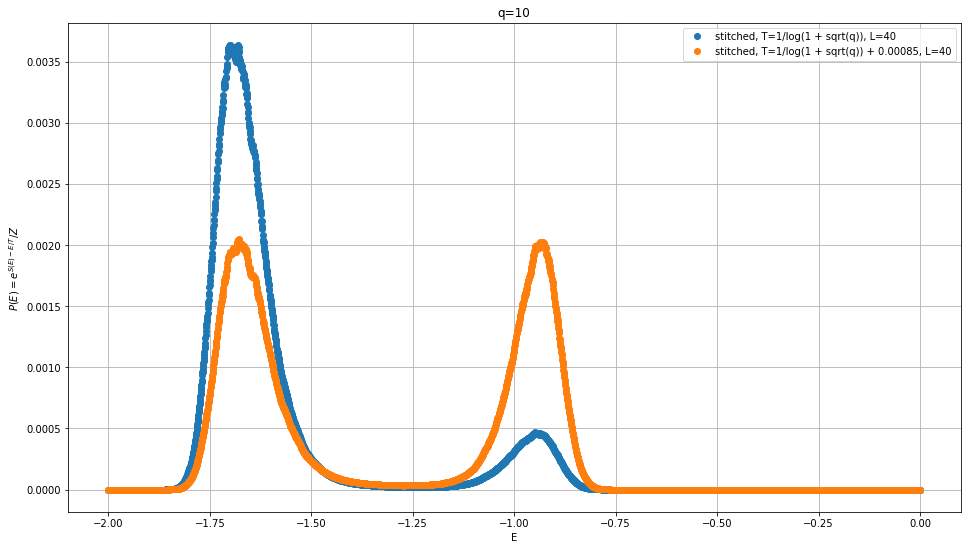

In [97]:
plt.figure(figsize=(16, 9))
i = 0
s = ["1/log(1 + sqrt(q))", "1/log(1 + sqrt(q)) + 0.00085"]
for j, T in enumerate([1 / beta, 1 / beta + 0.00085]):
    heat, cool, st = parameters[i]["heat"], parameters[i]["cool"], parameters[i]["stitched"]
    L = st['L']
    if (T in d[L]):
        y = d[L][T]
    else:
        y = np.array([mp.exp(mp.mpf(S) - mp.mpf(E) / T) for E, S in st["S"].items()])
        Z = sum(y)
        y /= Z
        d[L][T] = y
    x = np.array([E / (L * L) for E in st["S"]])

    plt.plot(x, y, 'o', label="stitched, T={}, L={}".format(s[j], L))

plt.ylabel('$P(E) = e^{S(E) - E / T} / Z$')
plt.xlabel("E")
#plt.xlim([0, 0.01])
#plt.ylim([0, 0.01])
#plt.yscale('log')
plt.title("q={}".format(q))
plt.legend()
plt.grid()
plt.savefig("./P(E)_Potts_q{}_L{}.png".format(q, st["L"]))

with open("./tmp/P(E)_Potts_q{}_L{}.txt".format(q, st["L"]), 'w') as fp:
    for E, P in zip(x, y):
        fp.write('{}\t{}\n'.format(E, P))

In [212]:
def gauss(x, mu, sigma, A):
    return A * np.exp(-( x - mu ) ** 2 / 2 / sigma ** 2)

def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return gauss(x, mu1, sigma1, A1) + gauss(x, mu2, sigma2, A2)

In [213]:
for T in [1 / beta]:
        heat, cool, st = parameters[i]["heat"], parameters[i]["cool"], parameters[i]["stitched"]
        L = st['L']
        if (T in d[L]):
            y = d[L][T]
        else:
            y = np.array([mp.exp(mp.mpf(S) - mp.mpf(E) / T) for E, S in st["S"].items()])
            Z = sum(y)
            y /= Z
            d[L][T] = y
        x = np.array([E / (L * L) for E in st["S"]])

x, y = list( zip(*sorted(zip(x, y), key=lambda x: x[0])) )
x = np.array(x)
y = np.array(y)

In [152]:
for T in [1 / beta]:
        heat, cool, st = parameters[i]["heat"], parameters[i]["cool"], parameters[i]["stitched"]
        L = st['L']
        if (T in d[L]):
            y = d[L][T]
        else:
            y = np.array([mp.exp(mp.mpf(S) - mp.mpf(E) / T) for E, S in st["S"].items()])
            Z = sum(y)
            y /= Z
            d[L][T] = y
        x = np.array([E / (L * L) for E in st["S"]])

x, y = list( zip(*sorted(zip(x, y), key=lambda x: x[0])) )
x = np.array(x[10:11000])
y = np.array([mp.log(z) for z in y[10:11000]])

In [153]:
def gauss(x, mu, sigma, A):
    return np.log(A) + (-( x - mu ) ** 2 / 2 / sigma ** 2)

def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return gauss(x, mu1, sigma1, A1) + gauss(x, mu2, sigma2, A2)

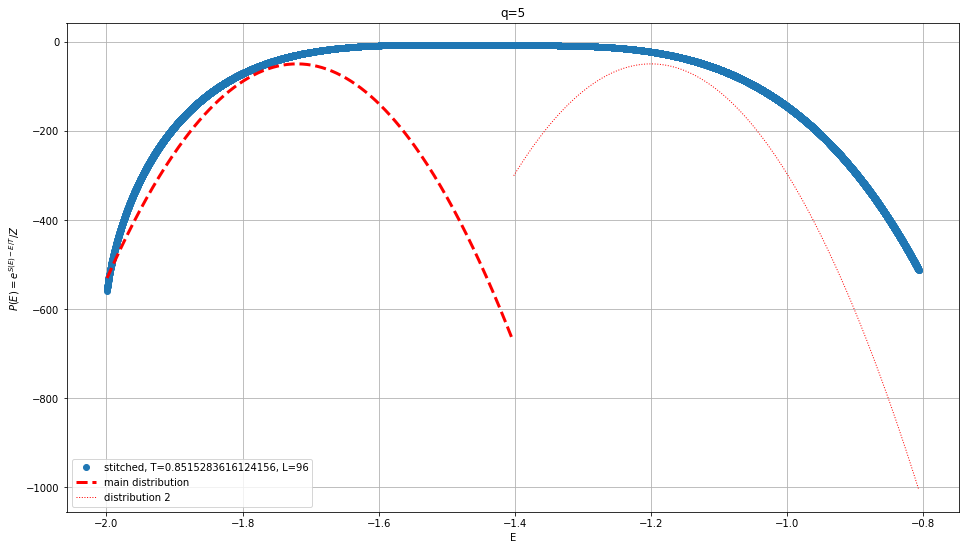

              params         sigma
mu1    -1.720000e+00  1.123605e-04
sigma1 -9.000000e-03  9.359639e-05
A1      1.928750e-22  2.348527e-06
mu2    -1.200000e+00  8.075276e-04
sigma2 -9.000000e-03  5.638156e-04
A2      1.928750e-22  7.814593e-07


In [202]:
plt.figure(figsize=(16, 9))



plt.plot(x, y, 'o', label="stitched, T={}, L={}".format(T, L))

plt.ylabel('$P(E) = e^{S(E) - E / T} / Z$')
plt.xlabel("E")
#plt.xlim([0, 0.01])
#plt.ylim([0, 0.01])
#plt.yscale('log')
plt.title("q={}".format(q))


#                   (mu1, sigma1, A1, mu2, sigma2, A2)
params = expected = (-1.72, -0.009, np.exp(-50), -1.2, -0.009, np.exp(-50))
#params, cov = curve_fit(bimodal, x, y, expected)
#sigma=np.sqrt(np.diag(cov))
x_fit = np.linspace(x.min(), x.max(), 500)
#plot combined...
#plt.plot(x_fit, bimodal(x_fit, *params), color='red', lw=3, label='model')
#...and individual Gauss curves
plt.plot(x_fit[0:250], gauss(x_fit[0:250], *params[:3]), color='red', lw=3, ls="--", label='main distribution')

#plt.plot(x, y - gauss(x, *params[:3]), lw=1, ls=":", label='experimental - main distribution')
plt.plot(x_fit[250:], gauss(x_fit[250:], *params[3:]), color='red', lw=1, ls=":", label='distribution 2')
#and the original data points if no histogram has been created before
#plt.scatter(x, y, marker="X", color="black", label="original data")
#plt.xlim([-1.8, -1.1])
#plt.yscale('log')
plt.legend()
plt.grid()
plt.show() 
print(pd.DataFrame(data={'params': params, 'sigma': sigma}, index=bimodal.__code__.co_varnames[1:]))


In [ ]:
beta_0 = np.log(1 + np.sqrt(q))
beta_0, 1 / beta_0

In [ ]:
plt.figure(figsize=(16, 9))
i = 0
s = ["1/log(1 + sqrt(q))", "1/log(1 + sqrt(q)) + 0.00085"]
for j, T in enumerate([1 / beta, 1 / beta + 0.00085]):
    heat, cool, st = parameters[i]["heat"], parameters[i]["cool"], parameters[i]["stitched"]
    L = st['L']
    if (T in d[L]):
        y = d[L][T]
    else:
        y = np.array([mp.exp(mp.mpf(S) - mp.mpf(E) / T) for E, S in st["S"].items()])
        Z = sum(y)
        y /= Z
        d[L][T] = y
    x = np.array([E / (L * L) for E in st["S"]])

    plt.plot(x, y, 'o', label="stitched, T={}, L={}".format(s[j], L))

plt.ylabel('$P(E) = e^{S(E) - E / T} / Z$')
plt.xlabel("E")
#plt.xlim([0, 0.01])
#plt.ylim([0, 0.01])
#plt.yscale('log')
plt.title("q={}".format(q))
plt.legend()
plt.grid()
plt.savefig("./P(E)_Potts_q{}_L{}.png".format(q, st["L"]))

with open("./tmp/P(E)_Potts_q{}_L{}.txt".format(q, st["L"]), 'w') as fp:
    for E, P in zip(x, y):
        fp.write('{}\t{}\n'.format(E, P))